# Classification Task

## Introduction:
##### This public dataset is part of Airbnb
##### The dataset can be found on : "https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data"

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Importing necessary packages

In [2]:
import pandas as pd
import numpy as np
import pyodbc
import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas import ExcelWriter
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# supress warnings :
import warnings 
warnings.filterwarnings('ignore')

In [4]:
### Data Import

In [5]:
df = pd.read_excel('AB_NYC_2019.xlsx')

### Preprocess data: 
    1)Explore data, 
    2)check for missing data 
    3)apply data scaling. Justify the type of scaling used.

In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df.shape

(48895, 16)

In [8]:
### Data Cleaning

##### 67260 null values out of (48895 * 16) = 782320 values across dataset, which is 8%.

In [9]:
# 67260 null values out of (48895 * 16) = 782320 values across dataset, which is 8%.
df.isna().sum()

id                                    0
name                                 26
host_id                               0
host_name                            22
neighbourhood_group                   0
neighbourhood                         0
latitude                          22604
longitude                         22604
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,26291.000000,26291.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.720584,-73.952017,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.058200,0.059901,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.683245,-73.990750,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723940,-73.970760,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.745675,-73.924555,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


##### Reading top 5 values

In [11]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,NaN,NaN,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Dropping colums last review,since it has 10052 out of 48895 44% null values

In [12]:
df.drop(['last_review'] , axis = 1 , inplace= True)

#### Replacing all na values in reviews per month with 0

In [13]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [14]:
df.reviews_per_month.isnull().sum()

0

In [15]:
### Data Imputation:

#### imputing null values in latitude and longitude with the help of column neighbourhood_group:

In [16]:
df.groupby('neighbourhood_group')[['latitude', 'longitude']].agg(lambda x:x.value_counts().index[0])

,latitude,longitude
neighbourhood_group,,
Bronx,40.81192,-73.91108
Brooklyn,40.68557,-73.96514
Manhattan,40.72615,-73.98589
Queens,40.74807,-73.90959
Staten Island,40.64497,-74.08645


In [17]:
df[df.isnull().any(axis=1)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,NaN,NaN,Private room,150,3,0,0.00,1,365
30,9668,front room/double bed,32294,Ssameer Or Trip,Manhattan,Harlem,NaN,NaN,Private room,50,3,242,2.04,3,355
31,9704,Spacious 1 bedroom in luxe building,32045,Teri,Manhattan,Harlem,NaN,NaN,Private room,52,2,88,1.42,1,255
33,9783,back room/bunk beds,32294,Ssameer Or Trip,Manhattan,Harlem,NaN,NaN,Private room,50,3,273,2.37,3,359
44,12343,BEST BET IN HARLEM,47727,Earl,Manhattan,Harlem,NaN,NaN,Entire home/apt,150,7,97,0.84,1,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,NaN,NaN,Entire home/apt,170,1,0,0.00,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,NaN,NaN,Private room,125,4,0,0.00,1,31
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,NaN,NaN,Private room,70,2,0,0.00,2,9
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,NaN,NaN,Shared room,55,1,0,0.00,6,2


In [18]:
df.latitude.loc[(df['neighbourhood_group'] == 'Manhattan') & (df['longitude'].isnull() | df['latitude'].isnull())] =  40.72615
df.longitude.loc[(df['neighbourhood_group'] == 'Manhattan') & (df['longitude'].isnull() | df['latitude'].isnull())] = -73.98589

In [19]:
df.latitude.loc[(df['neighbourhood_group'] == 'Brooklyn') & (df['longitude'].isnull() | df['latitude'].isnull())] =  40.68557
df.longitude.loc[(df['neighbourhood_group'] == 'Brooklyn') & (df['longitude'].isnull() | df['latitude'].isnull())] = -73.96514

In [20]:
df.latitude.loc[(df['neighbourhood_group'] == 'Queens') & (df['longitude'].isnull() | df['latitude'].isnull())] = 40.74807
df.latitude.loc[(df['neighbourhood_group'] == 'Queens') & (df['longitude'].isnull() | df['latitude'].isnull())] = -73.90959

In [21]:
df.latitude.loc[(df['neighbourhood_group'] == 'Staten Island') & (df['longitude'].isnull() | df['latitude'].isnull())] = 40.64497
df.latitude.loc[(df['neighbourhood_group'] == 'Staten Island') & (df['longitude'].isnull() | df['latitude'].isnull())] = -74.08645

In [22]:
df.latitude.loc[(df['neighbourhood_group'] == 'Bronx') & (df['longitude'].isnull() | df['latitude'].isnull())] = 40.81192
df.latitude.loc[(df['neighbourhood_group'] == 'Bronx') & (df['longitude'].isnull() | df['latitude'].isnull())] = -73.91108

In [23]:
df.dropna(inplace = True)

In [24]:
# rechecking for any na values
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [25]:
# new shape of the cleaned dataset
df.shape

(48847, 15)

In [33]:
# price distribution accross different neighbourhood groups:
df.pivot_table(index = 'neighbourhood_group', values ='price', aggfunc= ('min','max', np.mean))

,max,mean,min
neighbourhood_group,,,
Bronx,2500.0,87.469238,0.0
Brooklyn,10000.0,124.432975,0.0
Manhattan,10000.0,196.911275,0.0
Queens,10000.0,99.527106,10.0
Staten Island,5000.0,114.812332,13.0


In [34]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.72615,-73.98589,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

#### Checking skewness of price variable by seeing mean, median

In [36]:
df['price'].mean()

152.75705775175547

In [37]:
df['price'].min()

0

In [38]:
df['price'].median()

106.0

#### Taking mean of price, after removing outliers:

In [39]:
df.price[((df.price - df.price.mean()) / df.price.std()).abs() < 3].mean()

138.76972285849894

#### Target variable - all price greater than mean = 1, all price value less than mean as 0, for the purpose of classification

In [40]:
df['target'] = 0

In [41]:
df.loc[df['price'] > 139, 'target'] = 1


In [42]:
# Checking distribution of target variable:
df.target.value_counts()

0    30499
1    18348
Name: target, dtype: int64

In [43]:
#### Creating dummy variables for 'neighbourhood_group' and 'room_type' variables that are categorical for the purpose of building models:

In [44]:
neighbourhood_category=pd.get_dummies(df['neighbourhood_group'],columns='neighbourhood_group',prefix='neighbourhood_group')
df=pd.concat([df, neighbourhood_category], axis=1)
df.drop(['neighbourhood_group'],axis=1,inplace= True)

In [45]:
room_category=pd.get_dummies(df['room_type'],columns='room_type',prefix='room_type')
df=pd.concat([df, room_category], axis=1)
df.drop(['room_type'],axis=1,inplace= True)

#### Checking columns in modified dataframe:

In [46]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'target', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [47]:
df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.6475,40.7536,40.7261,40.6851,40.7985
longitude,-73.9724,-73.9838,-73.9859,-73.9598,-73.944
price,149,225,150,89,80
minimum_nights,1,1,3,1,10
number_of_reviews,9,45,0,270,9


#### assigning target variable to y

In [48]:
y = df[['target']]

#### Dropping redundant such as : 'latitude', 'longitude', 'price', 'calculated_host_listings_count', 'number_of_reviews', 'neighbourhood' 
#### and insignificant variables such as : 'id', 'name', 'host_id', 'host_name'

In [49]:
x = df.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'price', 'calculated_host_listings_count', 'number_of_reviews', 'neighbourhood', 'target'], axis = 1)

In [50]:
x.head().T

,0,1,2,3,4
minimum_nights,1.00,1.00,3.0,1.00,10.0
reviews_per_month,0.21,0.38,0.0,4.64,0.1
availability_365,365.00,355.00,365.0,194.00,0.0
neighbourhood_group_Bronx,0.00,0.00,0.0,0.00,0.0
neighbourhood_group_Brooklyn,1.00,0.00,0.0,1.00,0.0
neighbourhood_group_Manhattan,0.00,1.00,1.0,0.00,1.0
neighbourhood_group_Queens,0.00,0.00,0.0,0.00,0.0
neighbourhood_group_Staten Island,0.00,0.00,0.0,0.00,0.0
room_type_Entire home/apt,0.00,1.00,0.0,1.00,1.0
room_type_Private room,1.00,0.00,1.0,0.00,0.0


## Voting classifier:

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [59]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.7906157877497544
KNeighborsClassifier 0.7540124467736653
SVC 0.7805437274811661
VotingClassifier 0.7843105142482804


### Summary of hard voting classifier:
Accuracy of LogisticRegression = 0.7906157877497544               
Accuracy of KNeighborsClassifier = 0.7540124467736653                     
Accuracy of SVC = 0.7805437274811661                    
Accuracy of Hard VotingClassifier =  0.7843105142482804           

In [60]:
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)


voting_clf = VotingClassifier(estimators=[ ('svc', svm_clf), ('lr', log_clf), ('knn', knn_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.7906157877497544
KNeighborsClassifier 0.7540124467736653
SVC 0.7805437274811661
VotingClassifier 0.7865214543072387


### Summary of soft voting classifier:
Accuracy of LogisticRegression = 0.7906157877497544                 
Accuracy of KNeighborsClassifier = 0.7540124467736653                       
Accuracy of SVC =  0.7805437274811661                     
Accuracy of soft VotingClassifier = 0.7865214543072387               

## Bagging with Decision tree:

In [115]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=300,  bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [116]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7732558139534884


In [117]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.93
Test score: 0.77


In [118]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.7445135931870291


### Bagging with Decision Tree :
Train score of bagging with decision tree: 0.93   
Test score of bagging with decision tree: 0.77   
Accuracy of decision tree without bagging: 0.7445135931870291

Decision tree with bagging gives better accuracy.

## Random Forest bagging : 

In [79]:
dt_clf = DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=0)

In [80]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [130]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=300,  bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [131]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.74475925319358


In [132]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.93
Test score: 0.74


In [133]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.7445135931870291


In [81]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [82]:
np.sum(y_pred == y_pred_rf ) / len(y_pred)  # The two classifiers give almost identical predictions

0.9288404847690795

In [85]:

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(x, y)

for name, score in zip(x, rnd_clf.feature_importances_):
    print(name, score)

minimum_nights 0.06649836210315939
reviews_per_month 0.26123236202822486
availability_365 0.22400087089888707
neighbourhood_group_Bronx 0.002921033638279126
neighbourhood_group_Brooklyn 0.014938729978462397
neighbourhood_group_Manhattan 0.05288193725392076
neighbourhood_group_Queens 0.01155091720912519
neighbourhood_group_Staten Island 0.0010717029047226496
room_type_Entire home/apt 0.20804589750624924
room_type_Private room 0.14833034642443624
room_type_Shared room 0.008527840054533088


### Feature importance:
minimum_nights 0.06649836210315939    
reviews_per_month 0.26123236202822486    
availability_365 0.22400087089888707    
neighbourhood_group_Bronx 0.002921033638279126        
neighbourhood_group_Brooklyn 0.014938729978462397     
neighbourhood_group_Manhattan 0.05288193725392076     
neighbourhood_group_Queens 0.01155091720912519        
neighbourhood_group_Staten Island 0.0010717029047226496       
room_type_Entire home/apt 0.20804589750624924           
room_type_Private room 0.14833034642443624                  
room_type_Shared room 0.008527840054533088         

In [86]:
rnd_clf.feature_importances_

array([0.06649836, 0.26123236, 0.22400087, 0.00292103, 0.01493873,
       0.05288194, 0.01155092, 0.0010717 , 0.2080459 , 0.14833035,
       0.00852784])

In [87]:
dt_clf = DecisionTreeClassifier(random_state=0)

bag_clf = BaggingClassifier(dt_clf, n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True, random_state=0)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.7653064009826669

In [88]:
bag_clf.oob_decision_function_[:10]

array([[0.22279793, 0.77720207],
       [0.42857143, 0.57142857],
       [0.01142857, 0.98857143],
       [0.91623037, 0.08376963],
       [0.19933024, 0.80066976],
       [0.54395604, 0.45604396],
       [0.01694915, 0.98305085],
       [0.9740519 , 0.0259481 ],
       [0.99418605, 0.00581395],
       [0.30298114, 0.69701886]])

In [89]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7740746806419915

### Random Forest bagging : 
Random forest and decison tree classifier give almost identical predictions(0.9288404847690795)           
Out of bag score : 0.7653064009826669                  
Test score : 0.7740746806419915            


### Feature importance:
minimum_nights 0.06649836210315939    
reviews_per_month 0.26123236202822486    
availability_365 0.22400087089888707    
neighbourhood_group_Bronx 0.002921033638279126        
neighbourhood_group_Brooklyn 0.014938729978462397     
neighbourhood_group_Manhattan 0.05288193725392076     
neighbourhood_group_Queens 0.01155091720912519        
neighbourhood_group_Staten Island 0.0010717029047226496       
room_type_Entire home/apt 0.20804589750624924           
room_type_Private room 0.14833034642443624                  
room_type_Shared room 0.008527840054533088         

## Pasting with Decision tree :

In [114]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=300,  bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [115]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7444317065181788


In [116]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.93
Test score: 0.74


In [113]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.7442679331804782


### Pasting with Decision Tree :
Train score of pasting with decision tree: 0.93   
Test score of pasting with decision tree: 0.74   
Accuracy of decision tree without pasting: 0.7442679331804782

Decision tree without pasting gives better accuracy.

## Random forest pasting:

In [134]:
dt_clf = DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=0)

In [135]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [136]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [137]:
np.sum(y_pred == y_pred_rf ) / len(y_pred)  # The two classifiers give almost identical predictions

0.9275302980674747

In [138]:

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(x, y)

for name, score in zip(x, rnd_clf.feature_importances_):
    print(name, score)

minimum_nights 0.06649836210315939
reviews_per_month 0.26123236202822486
availability_365 0.22400087089888707
neighbourhood_group_Bronx 0.002921033638279126
neighbourhood_group_Brooklyn 0.014938729978462397
neighbourhood_group_Manhattan 0.05288193725392076
neighbourhood_group_Queens 0.01155091720912519
neighbourhood_group_Staten Island 0.0010717029047226496
room_type_Entire home/apt 0.20804589750624924
room_type_Private room 0.14833034642443624
room_type_Shared room 0.008527840054533088


In [139]:
rnd_clf.feature_importances_

array([0.06649836, 0.26123236, 0.22400087, 0.00292103, 0.01493873,
       0.05288194, 0.01155092, 0.0010717 , 0.2080459 , 0.14833035,
       0.00852784])

In [140]:
dt_clf = DecisionTreeClassifier(random_state=0)

bag_clf = BaggingClassifier(dt_clf, n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True, random_state=0)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.7653064009826669

In [141]:
bag_clf.oob_decision_function_[:10]

array([[0.22279793, 0.77720207],
       [0.42857143, 0.57142857],
       [0.01142857, 0.98857143],
       [0.91623037, 0.08376963],
       [0.19933024, 0.80066976],
       [0.54395604, 0.45604396],
       [0.01694915, 0.98305085],
       [0.9740519 , 0.0259481 ],
       [0.99418605, 0.00581395],
       [0.30298114, 0.69701886]])

In [142]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7740746806419915

### Random Forest with pasting:
Random forest and decison tree classifier give almost identical predictions(0.9275302980674747)           
Out of bag score : 0.7653064009826669              
Test score : 0.7740746806419915  

### Feature Importance:
minimum_nights 0.06649836210315939       
reviews_per_month 0.26123236202822486          
availability_365 0.22400087089888707                    
neighbourhood_group_Bronx 0.002921033638279126           
neighbourhood_group_Brooklyn 0.014938729978462397             
neighbourhood_group_Manhattan 0.05288193725392076          
neighbourhood_group_Queens 0.01155091720912519                
neighbourhood_group_Staten Island 0.0010717029047226496          
room_type_Entire home/apt 0.20804589750624924          
room_type_Private room 0.14833034642443624           
room_type_Shared room 0.008527840054533088          

## AdaBoost using decision tree classifier:

In [125]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth= 3), n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 0.796
Accuracy on test set: 0.795


In [126]:
ada_clf = AdaBoostClassifier(random_state=0)
ada_clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 0.793
Accuracy on test set: 0.796


In [127]:
ada_clf = AdaBoostClassifier(random_state=0, learning_rate=0.01)
ada_clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 0.766
Accuracy on test set: 0.772


### AdaBoost using Decision Tree:
Learning rate 0.5 :       
Accuracy on training set: 0.796                
Accuracy on test set: 0.795                               
  
Learning rate 1:           
Accuracy on training set: 0.793           
Accuracy on test set: 0.796             
      
Learning rate 0.01:                      
Accuracy on training set: 0.766                   
Accuracy on test set: 0.772                     

## AdaBoost using SGDClassifier:

In [124]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

ada_clf = AdaBoostClassifier(SGDClassifier(loss = 'hinge'), n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 0.740
Accuracy on test set: 0.740


In [128]:
ada_clf = AdaBoostClassifier(random_state=0)
ada_clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 0.793
Accuracy on test set: 0.796


In [129]:
ada_clf = AdaBoostClassifier(random_state=0, learning_rate=0.01)
ada_clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 0.766
Accuracy on test set: 0.772


### AdaBoost using SGDClassifier :
Learning rate 0.5 :       
Accuracy on training set: 0.740        
Accuracy on test set: 0.740                              
  
Learning rate 1:           
Accuracy on training set: 0.793           
Accuracy on test set: 0.796           
      
Learning rate 0.01:                      
Accuracy on training set: 0.766        
Accuracy on test set: 0.772  

## Gradient boost:

In [154]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.798
Accuracy on test set: 0.796


In [155]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.789
Accuracy on test set: 0.793


In [156]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.774
Accuracy on test set: 0.771


<IPython.core.display.Javascript object>


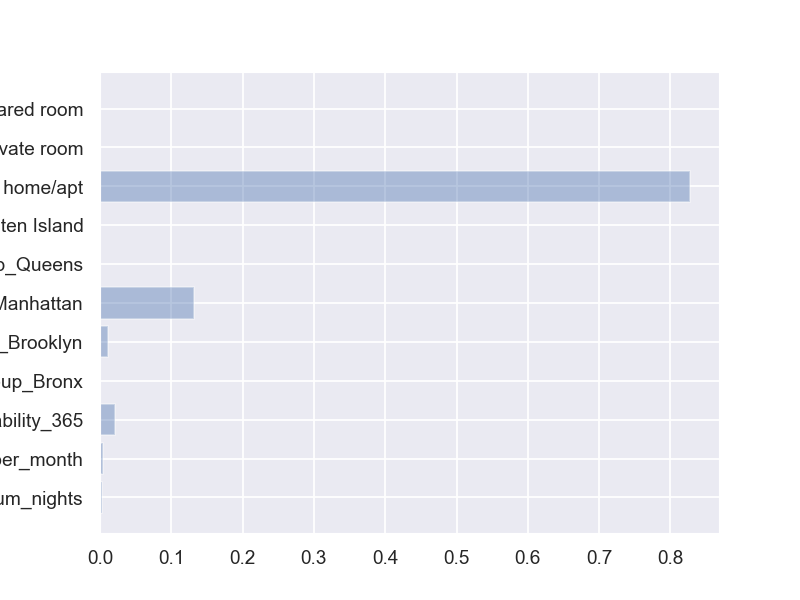

([<matplotlib.axis.YTick at 0x27e9098b160>,
 <a list of 11 Text yticklabel objects>)

In [157]:
%matplotlib notebook

y_list = gbrt.feature_importances_
y_pos = np.arange(len(y_list))
features = x
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

### Gradient Boosting:
Gradient boosting has dropped features with low importance     
Learning rate 1:            
Accuracy on training set: 0.789              
Accuracy on test set: 0.793                   
Learning rate 0.01:                      
Accuracy on training set: 0.774                    
Accuracy on test set: 0.771                   


### PCA

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
np.random.seed(0)
from sklearn.neighbors import KNeighborsRegressor

In [120]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


In [121]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)

In [123]:
pca.n_components_

5

## 1. KNN Classifier with PCA:

In [124]:
knn_reg = KNeighborsRegressor(17)
knn_reg.fit(X_train_reduced, y_train)
print('Train score: {:.4f}'.format(knn_reg.score(X_train_reduced, y_train)))
print('test score: {:.4f}'.format(knn_reg.score(X_test_reduced, y_test)))

Train score: 0.4261
test score: 0.3500


In [126]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
 
knn_reg = KNeighborsClassifier(17)
knn_reg.fit(X_train_reduced, y_train)
ypred = knn_reg.predict(X_test_reduced)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[6848 2645]
 [ 738 1981]]
0.5394145677331518


### PCA :
PCA reduced number of features from 11 to 5.               
### KNN with PCA           
Train score: 0.4261              
test score: 0.350                     
F-1 score : 0.5394145677331518               

### Summary of KNN Classifier:

Train score:0.4361              
Test score:0.3782                      
F1 score : 0.5592859046096457  


### KNN without PCA gives better overall results.

## 2. Decision tree

In [127]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


In [128]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)

In [130]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint 
param_grid = {'max_depth': np.arange(2, 11) , 'min_samples_split' : np.arange(2, 15)}
grid3 = GridSearchCV(DecisionTreeClassifier(random_state = 24), param_grid, cv = 5, return_train_score= True, iid = False, 
                    scoring = 'recall')

In [132]:
grid3.fit(X_train_reduced, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=24,
                                              splitter='best'),
             iid=False, n_jobs=None,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 2,

In [133]:
print(grid3.best_score_)
print(grid3.best_params_)

0.8345011337868481
{'max_depth': 3, 'min_samples_split': 2}


In [134]:
grid3.fit(X_test_reduced, y_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=24,
                                              splitter='best'),
             iid=False, n_jobs=None,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 2,

In [135]:
print(grid3.best_score_)

0.8253379253984005


In [106]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = grid3.predict(X_train_reduced)
print(f1_score(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))


0.7390295703316451
[[17339  5574]
 [ 2413 11309]]


### Summary of  Decision tree with PCA :

Train score:0.8345011337868481                
Test score:0.8253379253984005             
Best max depth:max depth : 3              
F1 score : 0.7390295703316451       

## Summary of Decision Tree Classifier without PCA:

Train score:0.8325319823479743                
Test score: 0.7919041344027297                       
Best Parameter : max depth = 3                
F1 score : 0.5592859046096457                        

### Decision tree with PCA gives better overall accuracy.

## 3. Logistic regression:

In [175]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


In [176]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [177]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
log_l2 = LogisticRegression(penalty = 'l2', C = 10)
#log_l1.fit(X_train, y_train)
log_l2.fit(X_train_reduced, y_train)
print(log_l2.score(X_train_reduced, y_train))
#test_score_l1.append(log_l1.score(X_test, y_test))
print(log_l2.score(X_test_reduced, y_test))

0.7834311450798417
0.7810350474942679


In [181]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.01,0.1,1,10]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [182]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'penalty': 'l1'}
Best cross-validation score: 0.78


In [183]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

log_l1 = LogisticRegression(penalty = 'l1', C = 1)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(log_l1 , X_train_reduced, y_train, cv=kfold)))
scores = cross_val_score(log_l1 , X_train_reduced, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.77743203 0.78873239 0.78169014 0.78005241 0.78709466 0.78607699]
0.7835131039683939


In [93]:
from sklearn.metrics import f1_score
log_l1 = LogisticRegression(penalty = 'l1', C = 10)
log_l1.fit(X_train_reduced, y_train)
ypred = log_l1.predict(X_test_reduced)
ft = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(ft)
print(cm)

0.0
[[7625 4587]
 [   0    0]]


### Summary of  Logistic Regression with PCA:
Train score: 0.7834311450798417           
Test score : 0.7810350474942679                   
Best Parameter: Best parameters: {'C': 1, 'penalty': 'l1'}             


### Summary of Logistic Regression:

Train score:0.7894909693959807          
Test score:0.7129536007190204           
Best Parameter : Best Parameter: Best parameters: {'C': 1, 'penalty': 'l1'}                        
F1 score : 0.71406578026592                   

### Logistic Regression with PCA gives better overall scire

## 4. Linear SVC 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [59]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [188]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)

In [72]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'linear')

parameters = {'C': [ 1, 10]}

grid_search = GridSearchCV(model,parameters, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [73]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.78


In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc = SVC(kernel = 'linear',C = 1)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc , X_train_reduced, y_train)
print(scores)
print(np.mean(scores))

[0.77620373 0.77202751 0.78208173]
0.7767709925136366


In [153]:
scores1 = cross_val_score(svc , X_test_reduced, y_test)
print(scores1)
print(np.mean(scores1))

[0.7813805  0.79145173 0.77297297]
0.7819350669755977


In [75]:
from sklearn.metrics import f1_score
svc = SVC(kernel = 'linear', C = 1 )
svc.fit(X_train_reduced, y_train)
ypred = svc.predict(X_test_reduced)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[5686  763]
 [1900 3863]]
0.7436711906824525


### Linear SVC with PCA :
Train score : 0.7767709925136366            
Test score : 0.7819350669755977            
Best parameters: {'C': 1}                               
F1 score : 0.7462424360726138            


### Linear SVC without PCA :
Train score : 0.7817116267911025              
Test score : 0.7870939674182121       
Best parameters: {'C': 1}                            
F1 score : 0.7436711906824525             

## Linear SVC without PCA gives better results

## 6. Kernel Svc

In [76]:
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'rbf')

parameters = {'C': [1, 10]}

grid_search = GridSearchCV(model,parameters, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [77]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.78


In [141]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc = SVC(kernel = 'rbf',C = 10)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc , X_train_reduced, y_train)
scores1 = cross_val_score(svc , X_test_reduced, y_test)
print(scores)
print(scores1)
print(np.mean(scores))

[0.78422863 0.78111693 0.78748669]
[0.78727585 0.79538197 0.77862408]
0.7842774180230463


In [142]:
print(np.mean(scores1))

0.7870939674182121


In [79]:
from sklearn.metrics import f1_score
svc = SVC(kernel = 'rbf', C = 10 )
svc.fit(X_train_reduced, y_train)
ypred = svc.predict(X_test_reduced)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[6506 1564]
 [1080 3062]]
0.6984489051094891


In [89]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

log_l1 = LogisticRegression(penalty = 'l1', C = 1)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(log_l1 , X_train_reduced, y_train, cv=kfold)))
scores = cross_val_score(log_l1 , X_train_reduced, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.62283    0.62479528 0.61955454 0.63445791 0.61808058 0.62653563]
0.6243756560657969


### Kernel SVC with PCA :
Train score : 0.7842774180230463   
Test score : 0.7870939674182121    
Best parameters: {'C': 10}            
F1 score : 0.6243756560657969          



## Summary of SVC kernel without PCA:

Train score:0.79      
Test score:0.79          
Best Parameter :C': 10          

### Summary of SVC without PCA gives better accuracy.

## Deep Learning:

In [82]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

Using TensorFlow backend.


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y)
x.shape

(48847, 11)

In [183]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

log_l1 = LogisticRegression(penalty = 'l1', C = 1)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(log_l1 , X_train_reduced, y_train, cv=kfold)))
scores = cross_val_score(log_l1 , X_train_reduced, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.77743203 0.78873239 0.78169014 0.78005241 0.78709466 0.78607699]
0.7835131039683939


In [85]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [86]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [87]:
# Fit the model
model.fit(X_train, y_train, epochs=150, batch_size=10)




Epoch 1/150





36635/36635 [==============================] - 9s 249us/step - loss: 0.5318 - acc: 0.7412
Epoch 2/150
36635/36635 [==============================] - 8s 226us/step - loss: 0.4588 - acc: 0.7809
Epoch 3/150
36635/36635 [==============================] - 8s 228us/step - loss: 0.4553 - acc: 0.7833
Epoch 4/150
36635/36635 [==============================] - 8s 224us/step - loss: 0.4519 - acc: 0.7855
Epoch 5/150
36635/36635 [==============================] - 8s 218us/step - loss: 0.4506 - acc: 0.7854
Epoch 6/150
36635/36635 [==============================] - 8s 214us/step - loss: 0.4494 - acc: 0.7859
Epoch 7/150
36635/36635 [==============================] - 8s 225us/step - loss: 0.4491 - acc: 0.7873
Epoch 8/150
36635/36635 [==============================] - 8s 226us/step - loss: 0.4479 - acc: 0.7874
Epoch 9/150
36635/36635 [==============================] - 8s 226us/step - loss: 0.4471 - acc: 0.7862
Epoch 10/150
36635/36635 [==============================] - 8s 225us/step 

36635/36635 [==============================] - 8s 222us/step - loss: 0.4351 - acc: 0.7926
Epoch 64/150
36635/36635 [==============================] - 8s 222us/step - loss: 0.4358 - acc: 0.7917
Epoch 65/150
36635/36635 [==============================] - 9s 247us/step - loss: 0.4353 - acc: 0.7918
Epoch 66/150
36635/36635 [==============================] - 9s 241us/step - loss: 0.4356 - acc: 0.7917
Epoch 67/150
36635/36635 [==============================] - 9s 255us/step - loss: 0.4353 - acc: 0.7915
Epoch 68/150
36635/36635 [==============================] - 9s 243us/step - loss: 0.4351 - acc: 0.7917
Epoch 69/150
36635/36635 [==============================] - 8s 221us/step - loss: 0.4353 - acc: 0.7922
Epoch 70/150
36635/36635 [==============================] - 8s 222us/step - loss: 0.4348 - acc: 0.7927
Epoch 71/150
36635/36635 [==============================] - 8s 222us/step - loss: 0.4353 - acc: 0.7919
Epoch 72/150
36635/36635 [==============================] - 8s 225us/step - loss: 0.43

### Summary of Deep learning:
Best cross validation score : 0.7835131039683939             
Accuracy : 0.7914

## AdaBoost with Decision tree and Learning rate 1:           
Accuracy on training set: 0.793           
Accuracy on test set: 0.796    